In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import datasets


In [2]:
data = pd.read_csv('../part2_ pandas/BostonHousing.csv')
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


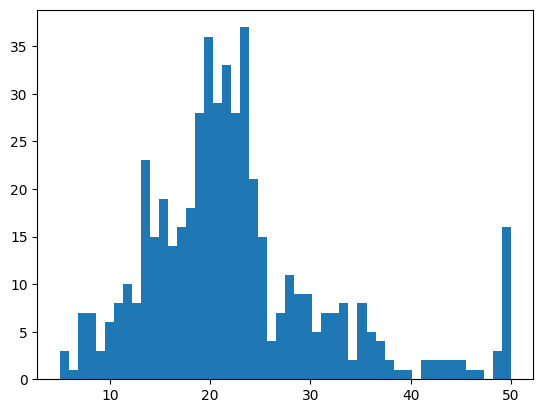

In [3]:
plt.hist(data['medv'], bins=50);
plt.show()

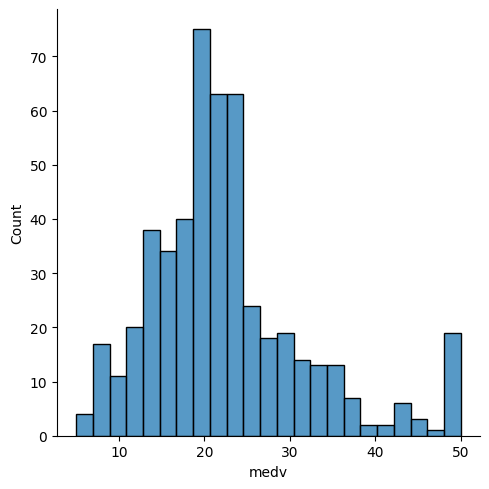

In [4]:
sns.displot(data['medv']);
plt.show()

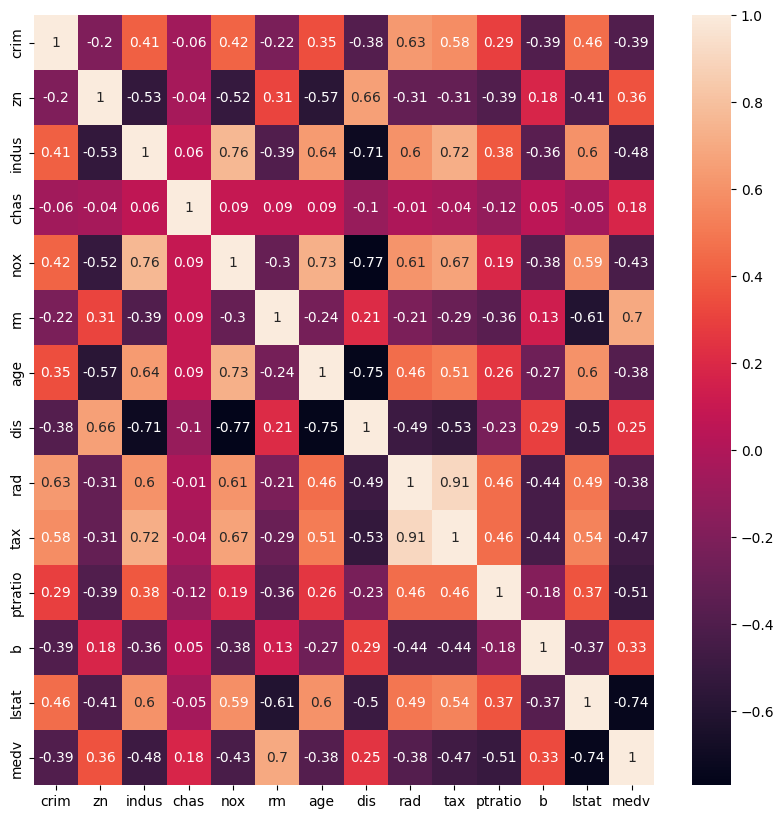

In [5]:
c = data.corr().round(2)  # کرولوشن یا همبستگی
plt.figure(figsize=(10,10))
sns.heatmap(c,annot=True)
plt.show()


# اون فیچری که کمترین کوریلیشن یا اونی که همبستگی کمتر داره رو میندازیم دور تا اور فیت نشه
# اگه اونی که بیشتره رو بزاریم بهتر میشه

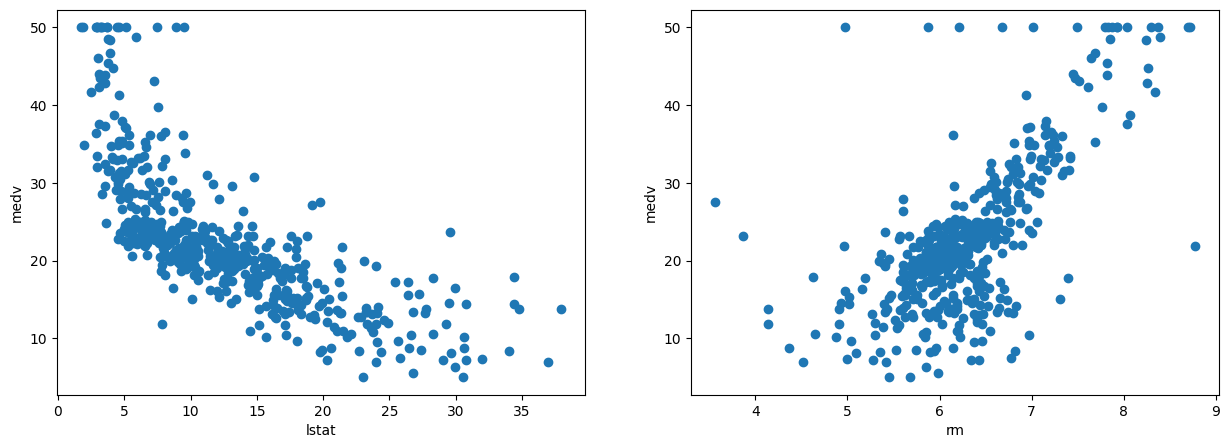

In [6]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(data['lstat'].values,data['medv'].values)
plt.ylabel('medv')
plt.xlabel('lstat')
plt.subplot(1,2,2)
plt.scatter(data['rm'].values,data['medv'].values)
plt.ylabel('medv')
plt.xlabel('rm')

plt.show()


In [7]:
x = data.drop('medv',axis=1).values
y = data['medv'].values

*iterables
test_size=None
train_size=None
random_state=None -> seed  اگه عدد بدیم چیزی که جنریت میکنه همیشه همون مقدار رو رندوم انخاب میکنه
shuffle=True
stratify=None -> نسبت ترکیب ها : اگه اینو بدیم مثلا اگه گربه و سگ باشه تارگت میاد 60 درصد از این و 40 اون برمیداره

In [8]:
np.random.seed(10)
np.random.randint(1,10,(10,))

array([5, 1, 2, 1, 2, 9, 1, 9, 7, 5], dtype=int32)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
X_train.shape,X_test.shape

((404, 13), (102, 13))

In [10]:
model = LinearRegression()

In [11]:
model.fit(X_train,y_train)

LinearRegression()

این داره میگه دقت کدوم بیشتره


In [12]:
model.score(X_train,y_train)

0.7558996088781669

In [13]:
model.score(X_test,y_test)

0.6726092217249372

تست بیشتر باشه دفت بهتره ولی اگه کمتر باشه یعنی اورفیت شده

Bias : accouracey  R2  دقت

Variance : صحت

In [14]:
p_train = model.predict(X_train)
p_test = model.predict(X_test)

این داره میگه خطی کدوم بیشتره مثلا پقک 500 گرم +- 20 گرم

In [15]:
mean_absolute_error(y_train,p_train)

3.130570162076332

In [16]:
mean_absolute_error(y_test,p_test)


3.665477549375511

In [17]:
y_train.std()

np.float64(9.011121459472019)

In [18]:
y_train.var()

np.float64(81.20030995735712)

In [19]:
x_2 = data.loc[:,['lstat','rm']].values
y_2 = data['medv'].values

In [20]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(x_2,y_2,test_size=0.2)
X_train_2.shape,X_test_2.shape

((404, 2), (102, 2))

In [21]:
model = LinearRegression()

In [22]:
model.fit(X_train_2,y_train_2)

LinearRegression()

In [23]:
model.score(X_train_2,y_train_2)

0.6201819788867587

In [24]:
model.score(X_test_2,y_test_2)

0.6868414219602694

In [25]:
x_2 = data.loc[:,['lstat','rm']]
y_2 = data['medv']

f = y_2[y_2==50].index
x_2 = x_2.drop(f)
x_2

,lstat,rm
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147
...,...,...
501,9.67,6.593
502,9.08,6.120
503,5.64,6.976
504,6.48,6.794


In [26]:
x_2 = data.loc[:,['lstat','rm']].values
y_2 = data['medv'].values
    
f = np.where(y_2!=50)
x_2 = x_2[f]
y_2 = y_2[f]

In [27]:
s = y_2.std()
(y_2>y_2.mean() + 3*s)|(y_2<y_2.mean() - 3*s)

f = np.where((y_2<y_2.mean() + 3*s)&(y_2>y_2.mean() - 3*s))
x_2 = x_2[f]
y_2 = y_2[f]

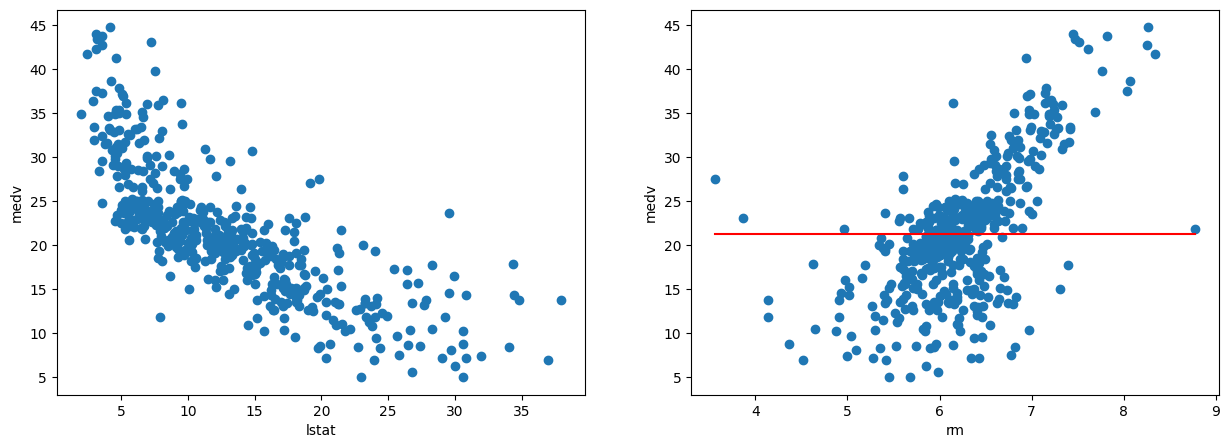

In [28]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(x_2[:,0],y_2)
plt.ylabel('medv')
plt.xlabel('lstat')
plt.subplot(1,2,2)
plt.scatter(x_2[:,1],y_2)
plt.ylabel('medv')
plt.xlabel('rm')
plt.plot([x_2[:,1].min(),x_2[:,1].max()],[y_2.mean(),y_2.mean()],'r')
plt.show()

In [29]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(x_2,y_2,test_size=0.2)
X_train_2.shape,X_test_2.shape

((387, 2), (97, 2))

In [30]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
poly.fit(X_train_2)
X_train_2_p  = poly.transform(X_train_2)
X_train_2_p

array([[  1.      ,  15.55    ,   6.229   , 241.8025  ,  96.86095 ,
         38.800441],
       [  1.      ,   9.25    ,   5.876   ,  85.5625  ,  54.353   ,
         34.527376],
       [  1.      ,  17.28    ,   6.047   , 298.5984  , 104.49216 ,
         36.566209],
       ...,
       [  1.      ,  24.16    ,   6.174   , 583.7056  , 149.16384 ,
         38.118276],
       [  1.      ,  20.31    ,   6.404   , 412.4961  , 130.06524 ,
         41.011216],
       [  1.      ,  15.84    ,   5.79    , 250.9056  ,  91.7136  ,
         33.5241  ]], shape=(387, 6))

In [31]:
model = LinearRegression(fit_intercept=False)

In [32]:
model.fit(X_train_2_p,y_train_2)

LinearRegression(fit_intercept=False)

In [33]:
model.score(X_train_2_p,y_train_2)

0.7568524857418198

In [34]:
X_test_2_p = poly.transform(X_test_2)

In [35]:
model.score(X_test_2_p,y_test_2)

0.7021136924738609

In [36]:
p_train_2_p = model.predict(X_train_2_p)
p_test_2_p = model.predict(X_test_2_p)

In [37]:
mean_absolute_error(y_train_2,p_train_2_p)

2.7476542191195135

In [38]:
mean_absolute_error(y_test_2,p_test_2_p)


2.942196052669638